### Time Series Analysis : Check for stationarity

In [1]:
import pandas as pd
import math
import numpy as np
import calendar
import seaborn as sns
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

The dataset used in this tutorial is from Kaggle, here is the link: https://www.kaggle.com/rakannimer/air-passengers

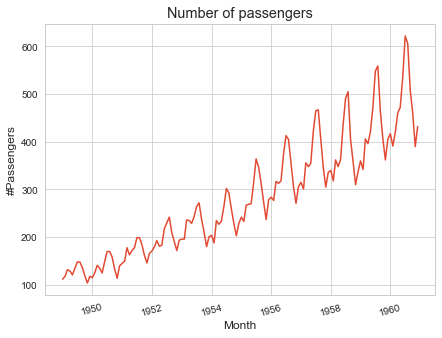

In [2]:
passenger_data = pd.read_csv('AirPassengers.csv')
passenger_data.Month = pd.to_datetime(passenger_data.Month, 
                                      infer_datetime_format=True)
# Time series visulizatioin 
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
sns.lineplot(x="Month", y="#Passengers", data=passenger_data)
plt.xticks(rotation=15)
plt.title('Number of passengers')
plt.show()

### Stationary time series
The predictions for the stationarized series can then be "untransformed," by reversing whatever mathematical transformations were previously used, to obtain predictions for the original series. Thus, finding the sequence of transformations needed to stationarize a time series often provides important clues in the search for an appropriate forecasting model.  

Most business and economic time series are far from stationary when expressed in their original units of measurement, and even after deflation or seasonal adjustment they will typically still exhibit trends, cycles, random-walking, and other non-stationary behavior. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

Another reason for trying to stationarize a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.

If the series has a stable long-run trend and tends to revert to the trend line following a disturbance, it may be possible to stationarize it by de-trending (e.g., by fitting a trend line and subtracting it out prior to fitting a model, or else by including the time index as an independent variable in a regression or ARIMA model), perhaps in conjunction with logging or deflating. Such a series is said to be **trend-stationary**. However, sometimes even de-trending is not sufficient to make the series stationary, in which case it may be necessary to transform it into a series of period-to-period and/or season-to-season differences.  If the mean, variance, and autocorrelations of the original series are not constant in time, even after detrending, perhaps the statistics of the changes in the series between periods or between seasons will be constant. Such a series is said to be **difference-stationary**. 

### Check for Stationarity

There are mainly 2 ways to check for Stationarity of a time series:

**1. Rolling Statistics** - Plot the moving avg or moving standard deviation to see if it varies with time. Its a quick and rough way to check if your time series is stationary.

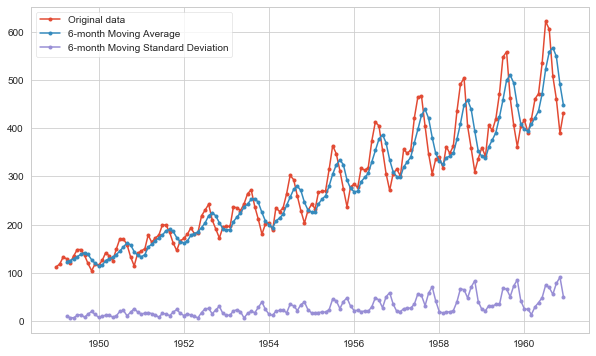

In [11]:
x = passenger_data.Month
y = passenger_data['#Passengers']
# Calculating the short-window simple moving average
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.-', label='Original data')
plt.plot(x, y.rolling(window=4).mean(), '.-', label='6-month Moving Average')
plt.plot(x, y.rolling(window=4).std(), '.-', label='6-month Moving Standard Deviation')
plt.legend()
plt.show()

It is obvious that both of the average and standard deviation of the time series change over time, which implies a non-stationary time series.

**2. Augmented Dickey–Fuller (ADF) Test** - The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. 

$$H_{0}: \text{A unit root is present in a time series (non-stationary)} \qquad H_{a}:  \text{Time series is stationary}$$

The ADF test statistic is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

We can also use p-value to interpret the test result. If a p-value is lower than some threshold (level of significance such as 0.05 or 0.01) indicates strong evidence against the null hypothesis, so we reject the null-hypothesis. Otherwise we failt to reject the null hypothesis, the data is non-stationary.

In [13]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05 # You can choose arbitrary level of significance
adf_test = adfuller(passenger_data['#Passengers'].values)
test_stat, p_value, cirtical_values= adf_test[0], adf_test[1], adf_test[4]

print('ADF Statistic: %f' % test_stat)
print('p-value: %f' % p_value)
print('Time Series is non-stationary') if p_value > alpha else print('Time Series is stationary')
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Time Series is non-stationary
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The p-value is very big, which implies a strong evidence of null hypothesis. Thus, we say we fail to reject the null hypothesis. The time series is non-stationary.

Let's do some transformation to stationarize the time series using the methods we talk about in the TS transformation tutorial and do the test again.

In [14]:
x = passenger_data.Month
y = passenger_data['#Passengers']   # Original
y1 = np.log(y)                      # Log transformation to stabilize the variance
y2 = y1.diff(periods=1)             # First order difference of the log to eliminate the linear trend
y3 = y2.diff(periods=12)            # 12th difference of the 1st difference of the log to eliminate the annual cycle

In [20]:
alpha = 0.05 # You can choose arbitrary level of significance
adf_test = adfuller(y3.dropna())
test_stat, p_value, cirtical_values= adf_test[0], adf_test[1], adf_test[4]

print('ADF Statistic: %f' % test_stat)
print('p-value: %f' % p_value)
print('Time Series is non-stationary') if p_value > alpha else print('Time Series is stationary')
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.443325
p-value: 0.000249
Time Series is stationary
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


Great! The p-value is way less the one we got before, we can reject the null-hypothesis and say the time series is stationary now. 